# Question 2: Visualization

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# Import our csv data from question 1
main = pd.read_csv("/Users/cwbenton/MATH4140/HW/HW2/cbento23_1h.csv", index_col=0)
main.head()

,movieId,imdbId,tmdbId,title,genres,tagId,relevance,tag,tmdbId_recoded
0,1,114709,862,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0.02475,007,2
1,1,114709,862,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,0.02475,007 (series),2
2,1,114709,862,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,0.04900,18th century,2
3,1,114709,862,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,0.07750,1920s,2
4,1,114709,862,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0.12450,1930s,2


## PART A

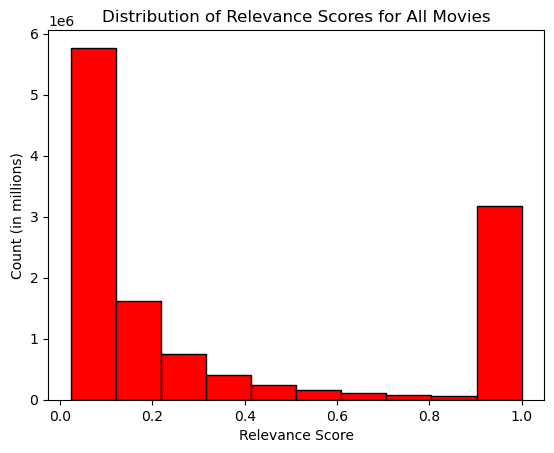

<Figure size 640x480 with 0 Axes>

In [13]:
# Create a histogram of relevance scores for all movies.
bins = pd.cut(main["relevance"], 10)
plt.hist(main["relevance"], bins=10, color="red", edgecolor="black")
plt.title("Distribution of Relevance Scores for All Movies")
plt.xlabel("Relevance Score")
plt.ylabel("Count (in millions)")
plt.show()

# Save the plot
plt.savefig("/Users/cwbenton/MATH4140/HW/HW2/cbento23_2a.png")

## PART B

In [19]:
'''
In the case of this dataset, movies can belong to multiple genres. Since there are 947
unique combinations, I will only use the first entry of the genre. We should note this is not
representative AT ALL since the genres are listed in alphabetical order; however, I do not see
it realistic to make a box plot of hundreds of unique genres. To do this, we will just split the
string to only include the first genre and put this in a new column 'new_genre'
'''
# main["genres"].unique()
# Makes an array called str of two elements split at the first |. We grab the first element of str.
main["new_genre"] = main["genres"].str.split("|", n=1).str[0]
main["new_genre"].value_counts()

new_genre
Comedy                3412200
Drama                 3262176
Action                2098080
Adventure              758016
Crime                  715152
Horror                 647472
Documentary            487296
Animation              261696
Children               234624
Thriller               119568
Sci-Fi                  76704
Mystery                 67680
Western                 63168
Fantasy                 55272
Romance                 51888
Musical                 34968
Film-Noir               20304
War                     11280
(no genres listed)      10152
Name: count, dtype: int64

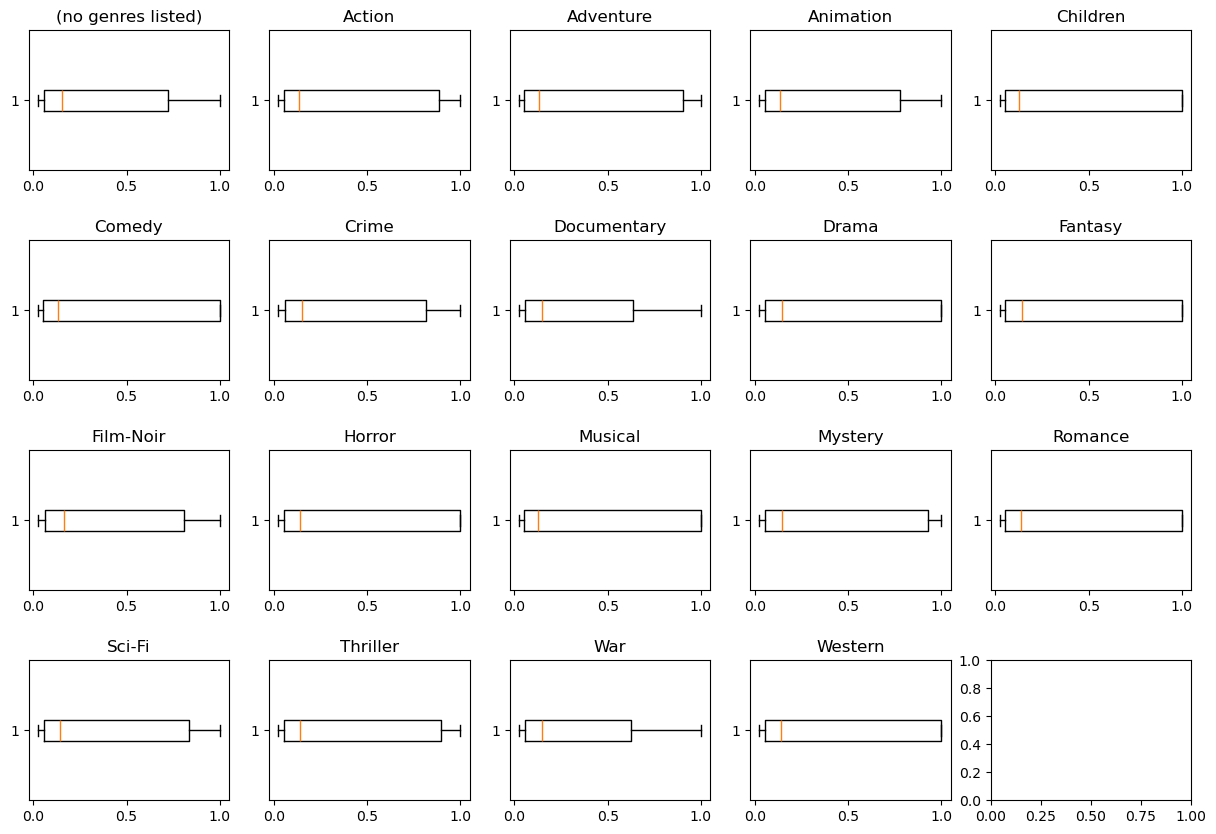

<Figure size 640x480 with 0 Axes>

In [43]:
# Creates 20 plots in a 4x5 arrangement and each figure is 15in x 10in
fig, axs = plt.subplots(4, 5, figsize=(15, 10))
# This just gives some padding between the subplots
fig.subplots_adjust(hspace=0.5)

# Had to look this up. We need to do this before iterating over each subplot.
axs = axs.flatten()

# Iterate over each genre and make a boxplot for it.
for i, (genre, rel) in enumerate(main.groupby("new_genre")["relevance"]):
    axs[i].boxplot(rel, vert=False)
    axs[i].set_title(genre)

# Ideally want to get rid of the empty plot in the bottom right, I'm sure there is a way.

plt.show()
plt.savefig("/Users/cwbenton/MATH4140/HW/HW2/cbento23_2b.png")

## PART C

In [53]:
'''
We will be using the same new genre category that I created. To make things easier, I'm just going
to use a new dataframe of the proportions.
'''
prop_df = pd.DataFrame((main["new_genre"].value_counts())/len(main)).reset_index()
prop_df.columns = ["genre", "proportion"]
prop_df

,genre,proportion
0,Comedy,0.275451
1,Drama,0.263340
2,Action,0.169368
3,Adventure,0.061191
4,Crime,0.057731
5,Horror,0.052267
6,Documentary,0.039337
7,Animation,0.021125
8,Children,0.018940
9,Thriller,0.009652


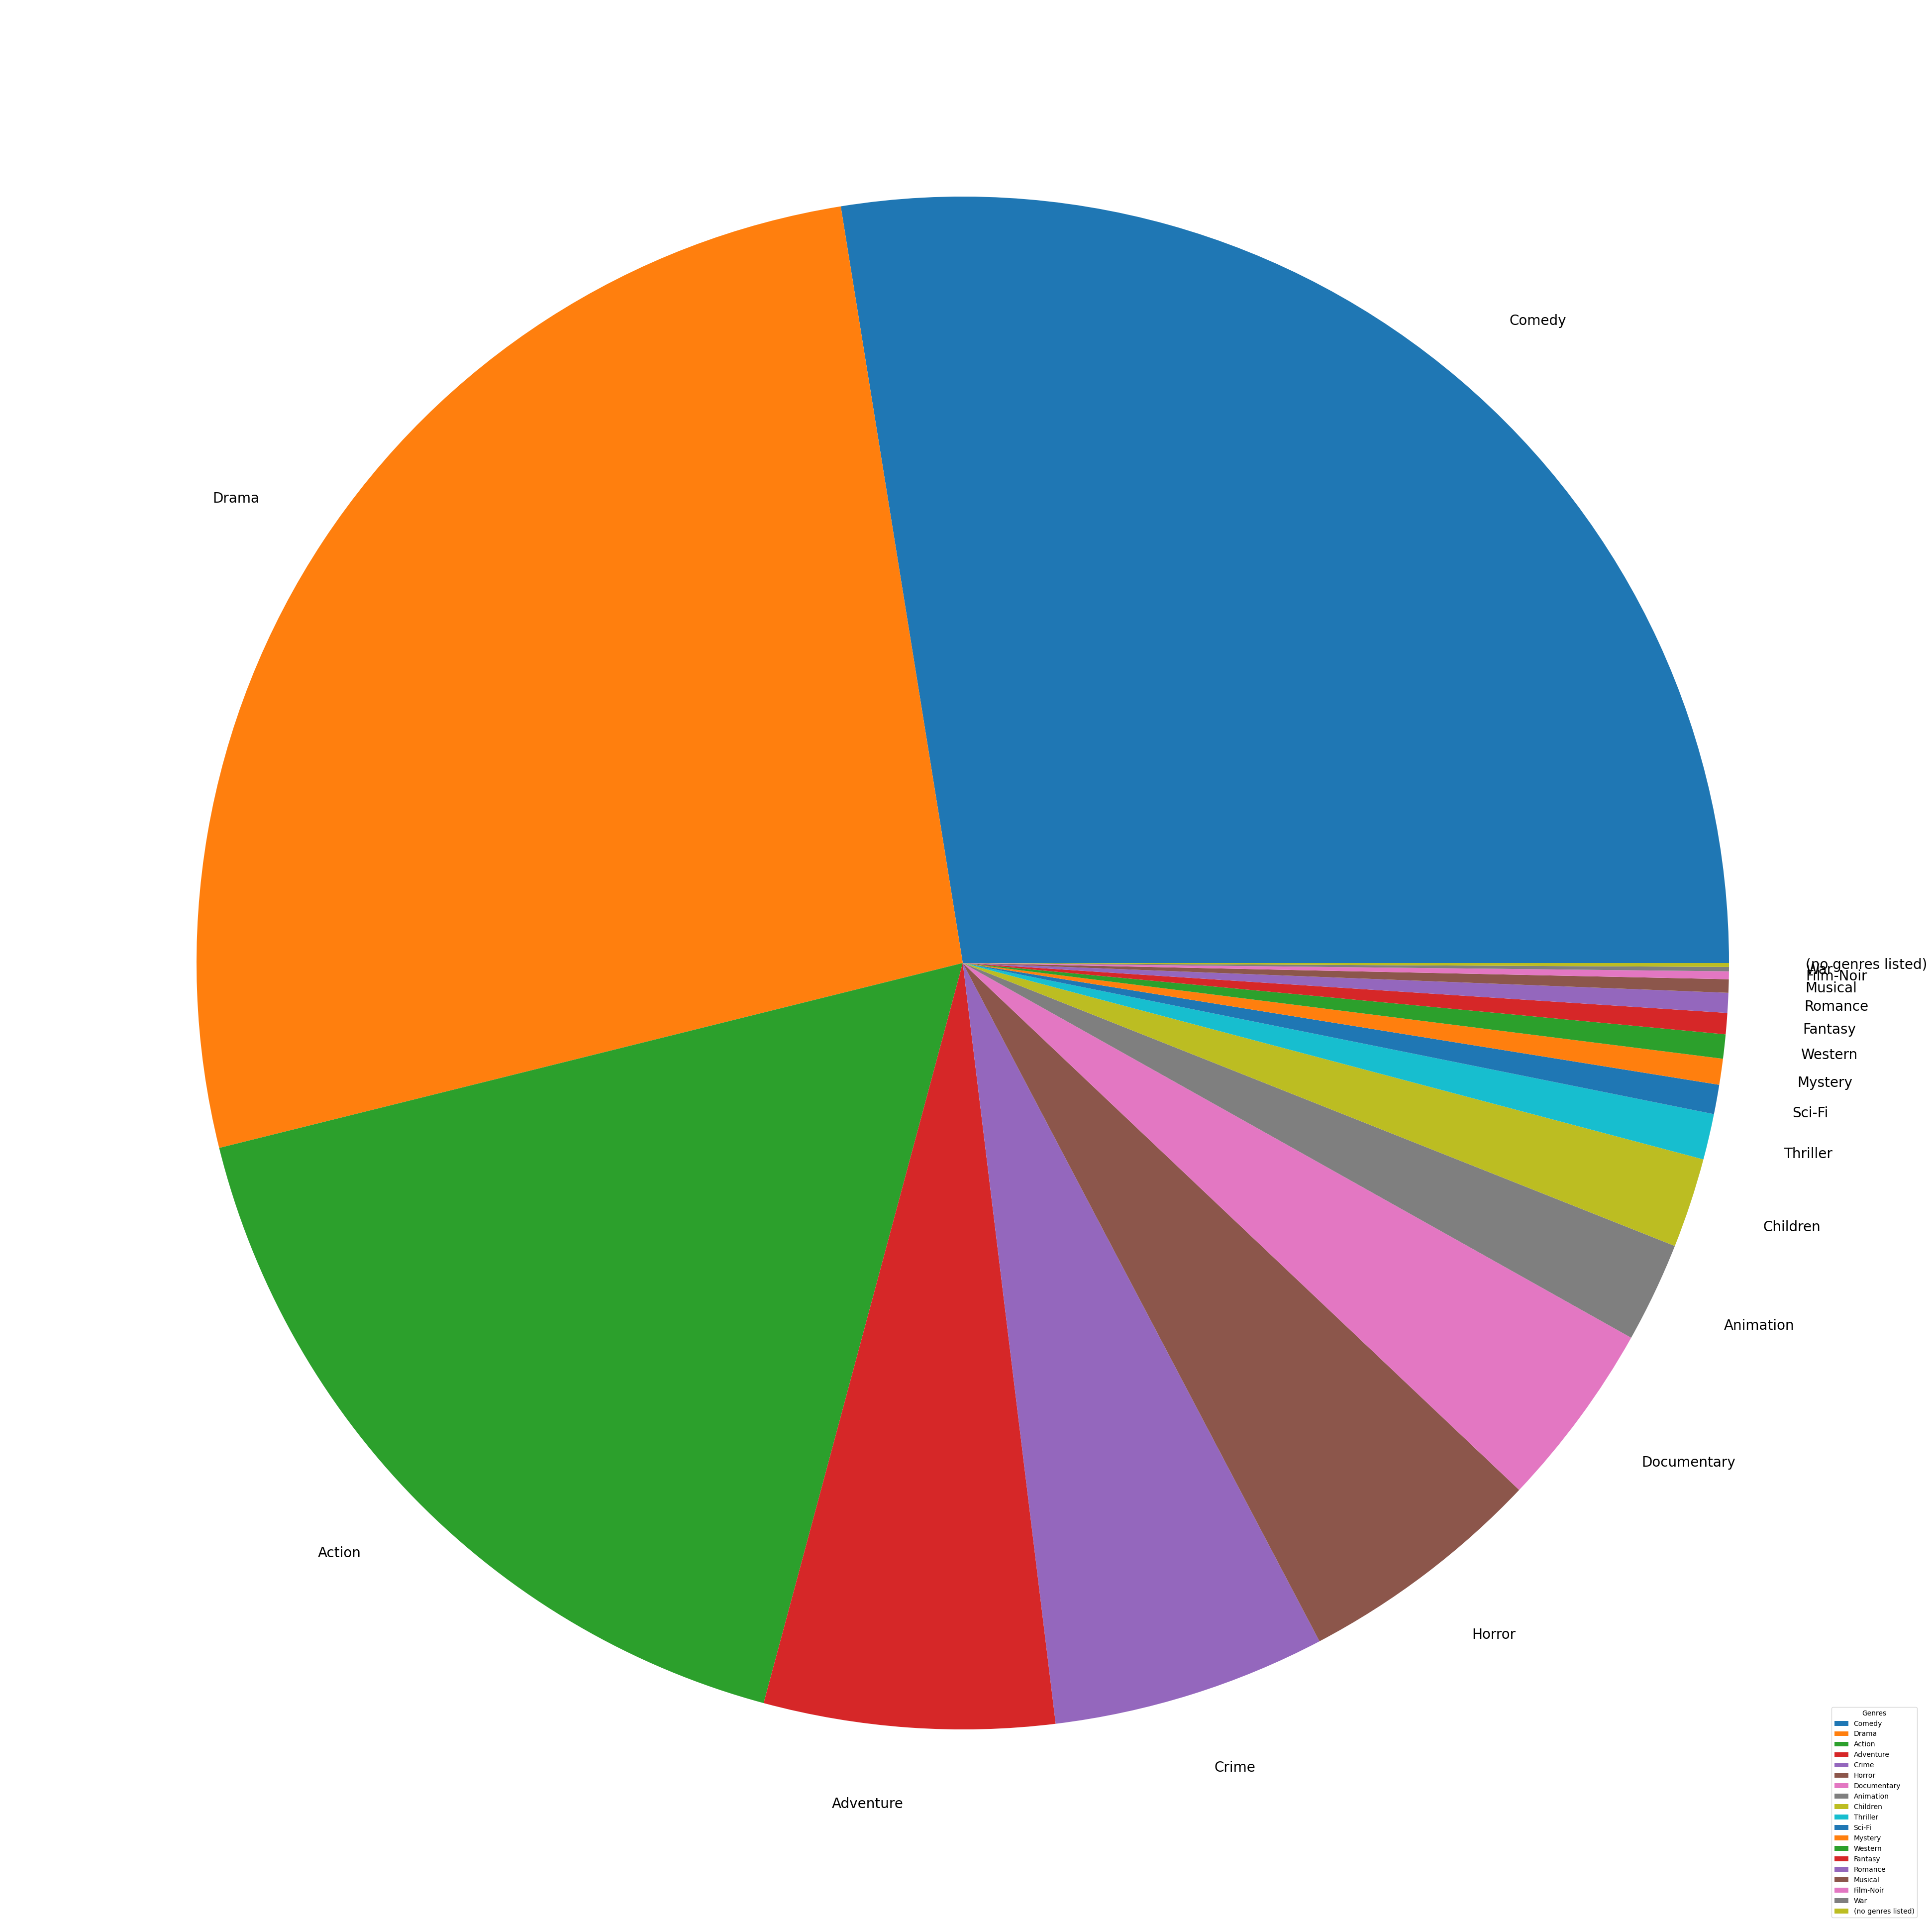

<Figure size 640x480 with 0 Axes>

In [66]:
# Making the boxplot
plt.figure(figsize=(50,50))
# I manually adjusted the fontsize to better see all the labels. There are just too many
# In practice, I would probably just combine the smaller labels into "Other".
plt.pie(prop_df["proportion"], labels=prop_df["genre"], textprops={'fontsize':20})
plt.legend(title="Genres",loc="lower right")
plt.show()

plt.savefig("/Users/cwbenton/MATH4140/HW/HW2/cbento23_2c.png")